## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('group == "treatment" and landing_page != "new_page"').count() + df.query('group != "treatment" and landing_page == "new_page"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
# To check null values
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# create a dataframe for users in control group 
df_control = df.query('group == "control" and landing_page == "old_page"')

In [9]:
# create a dataframe for users in treatment group
df_treatment = df.query('group == "treatment" and landing_page == "new_page"')

In [10]:
# verify if the count of the two data frames plus the deleted rows matches with the original one
df.shape[0] == df_control.shape[0] + df_treatment.shape[0] + 3893

True

In [11]:
# add the dataframes into new dataframe
df2 = df_control.append(df_treatment)

In [12]:
df2.sort_index(inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.duplicated(['user_id'],keep= False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.drop_duplicates(['user_id'],inplace=True)

In [18]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
total_mean = df2.converted.mean()
total_mean

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
control_mean = df2.query('group == "control"').converted.mean()
control_mean

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
treatment_mean = df2.query('group == "treatment"').converted.mean()
treatment_mean

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
probability_new_page = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
probability_new_page

0.5000619442226688

In [23]:
# Compute the obsolute difference in the convertion rate between control group and experiment group
obs_diff = treatment_mean - control_mean

# display observed difference
obs_diff

-0.0015782389853555567

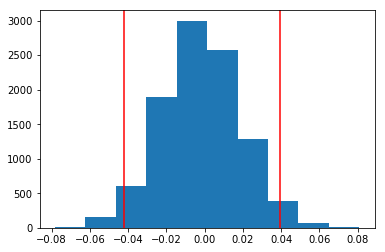

In [24]:
# create sampling distribution of difference in average convertion rates between control group and experiment group
# with boostrapping
diffs = []
# size = df2.shape[0]
for _ in range(10000):
    b_samp = df2.sample(1000, replace=True)
    control_mean = b_samp.query('group == "control"').converted.mean()
    treatment_mean = b_samp.query('group == "treatment"').converted.mean()
    diffs.append(treatment_mean - control_mean)

# convert to numpy array
diffs = np.array(diffs)

# lower and upper bounds to build 95% confidence interval
lower , upper  = np.percentile(diffs,2.5) , np.percentile(diffs,97.5)
# plot sampling distribution
plt.hist(diffs);
plt.axvline(x=lower, color='red');
plt.axvline(x=upper, color='red');

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Above is the sampling distribution of difference in convertion rates for both treament and control groups.we plotted the lower and upper bounds with 95% confidence interval.Observed difference the mean converstion for both treatment and control group is -0.001578 which may suggest that convertion rates for treatment grouo/new_page is more than convertion rate for control/old_page. However this is not backed by the sampling distribution of difference in means generated by bootstrapping. Not all the values in the confidence interval are less than 0.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$p_{new}  - p_{old} \leq 0$$**
**$$p_{new} - p_{old} > 0 $$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [27]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [28]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.binomial(1,p_new,n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = np.random.binomial(1,p_old,n_old)



g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
new_page_converted.mean() - old_page_converted.mean()

-0.00069042720472850538

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new)
    ol_page_converted = np.random.binomial(1,p_old,n_old)
    p_new = new_page_converted.mean()
    p_old = ol_page_converted.mean()
    p_diffs.append(p_new - p_old)


    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

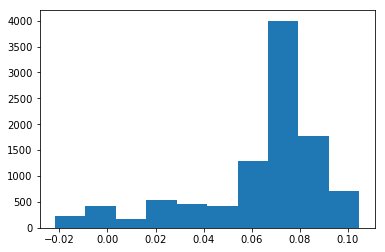

In [34]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
# This is the observed statistic from ab_data.csv
obs_diff

-0.0015782389853555567

In [36]:
p_val = (p_diffs > obs_diff).mean()
p_val

0.95340000000000003

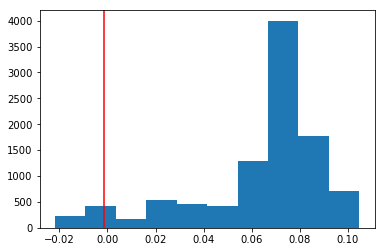

In [37]:
plt.hist(p_diffs);
plt.axvline(obs_diff,color = 'r');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

** p_val is the probability of obtaining the obersed statistic or a more extrement value if the null hypothesis is true. Our observed statistic in ab_data.csv is the observed difference the average convertion rates for treament and control groups. In out case the obeserved statistic is -0.001578. Plotting this on the sampling distribution of difference in means generated under the null hypothesis shows the area on the distribution that falls to the right of the observed statistic. In this case p value is 0.9534, so 95.34% of the values in the null hypothesis fall above the  observed statistic. 
The Type-1 error rate in this case is 5%.$$p = 0.9534$$$$\alpha = 0.05$$p-val is above this so there is substantial evidence to fail to reject the null hypothesis. On average old page is leads to better or equal convertion rates than the new page **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "new_page"').shape[0]
n_new = df2.query('landing_page == "old_page"').shape[0]

n_old,convert_old,n_new,convert_new 

(145310, 17489, 145274, 17264)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],value=0,alternative='larger')
z_score, p_value

(-1.2616957421858055, 0.89647085519672265)

In [41]:
# for 95% confidence interval what is the z_score
from scipy.stats import norm

z_upper = norm.ppf(q = 0.975)
z_lower = norm.ppf(q = 0.025)
z_upper,z_lower

(1.959963984540054, -1.9599639845400545)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

** we are testing this null hypothesis at 95% confidence level. This sets the critical z score value at 1.9599. The z score of the distribution of the data in ab_data.csv is 1.2616 is less than the critical z score.Also the p value computed 0.8964 which is also greater than the Type-1 error threshold of 0.05. Hence we fail to reject the null hypothesis ** 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since we want to predict the outcome if a user has converted or not, we should be performing Logistic Regressions in this case. **

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
df2[['treatment','control']] = pd.get_dummies(df2['group'])
df2.drop('treatment',axis=1,inplace=True)
df2 = df2.rename(columns={"control":"ab_page"})
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [44]:
log_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Oct 2018   Pseudo R-squ.:               8.077e-06
Time:                        17:32:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**p value associated with ab_page in the logistic regression model is 0.190, where as the p value calculated in Part II is approximatley 0.9 .
The Null and Alternative hypothesis in the regression model is as follows:
Null : There is no releationship between the converted and ab_page( which is 1 if the user received new_page 0 if the user received old_page)
Alternative : There is a relationship between the converted and ab_page( which is 1 if the user received new_page 0 if the user received old_page)
Since the p-value in Logistic Regression Model is 0.190 we reject the null hypothesis that says there is no relationship between convertion rate and the page user received. Above logistic model proves that there is dependency between convertion and the page user received.
The Null and Alternative hypothesis in the Part II A/B Testing is as follows:
Null : Average convertion rate for the old page is equal or greater than average convertion rate for new page.
Alternative: Average convertion rate for the old_page is less than the average convertion rate for new page.
**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding additional variables will give insights into any additional factors that must have contributed to conversion.
This will be useful when we want to understand the dependent factors for the predicted variable.
 In the have of A/B testing this may deviate from the hypothesis we want to prove, i.e to help Audacity understand which page is better.Addition factors may lead to biased results. for example if some users accessed the page at a time when they are not busy and that may have contributed the convertion.** 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [47]:
### Create the necessary dummy variables
df_new = df_new.join(pd.get_dummies(df_new['country']))
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
851104,US,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,0,1
804228,US,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,0,1
661590,US,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1
853541,US,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1
864975,US,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
## Fit Your Linear Model And Obtain the Results
log_mod2 = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US']])
results = log_mod2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 17 Oct 2018   Pseudo R-squ.:               2.323e-05
Time:                        17:34:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [50]:
np.exp(results.params)

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64

In [51]:
1/np.exp(-0.0149)

1.0150115583846535

<a id='conclusions'></a>
## Conclusions


**For every one unit decrease in ab_page conversion is 1.015 times likely,holding everything else constant
For every one unit increase in UK conversion is 1.05 times more likely than CA,holding everything else constant
For every one unit increase in US conversion is 1.04 times likely than CA, holding everything else constant.
Considering the p-values for all the factors is very less the relation ship between conversion and the facotrs used in regression model is not statistically significant.**


Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.